<a href="https://colab.research.google.com/github/ha-yun/GSTEC/blob/main/210909.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 웹 애플리케이션

- python runserver  
web server <-> web application  
django에 gunicorn 설치, docker image + container  


- django와 nginx 연동  
nginx는 edit configuration 상태이기 때문에 설정을 해주어야 한다. 

user의 요청을 nginx에서 받은 후 django gunicorn 으로 (network)

nginx.conf는 프로젝트 최상위 폴더에 생성!   
https://gunicorn.org/#deployment


In [ ]:
# gsweb\nginx.conf

worker_processes auto;

events{
}

http {
  server {
    listen 80;

    location / {
        proxy_pass http://django:8000;
        proxy_set_header Host $host;
        proxy_set_header X-Forwarded-For $proxy_add_x_forwarded_for;
    }
  }
}

1. portainer빼고 다른 container을 모두 삭제해준다.
2. 네트워크 생성
3. django컨테이너 네트워크 포함 배포
4. nginx.conf 작성
5. nginx.conf파일 가상 서버 전송(filezilla기반 - 사이트 등록시 계정은 구글 이메일 아이디)
6. nginx 컨테이너 배포(네트워크, 볼륨 설정까지)
```
 container - /etc/nginx/nginx.conf
host - /home/<gcp_email_username>/nginx.conf
```


aws는 /home/ubuntu/nginx.conf  
google cloud platform은 /home/deu05230/nginx.conf

-----------------

https://filezilla-project.org/download.php  
filezilla download!


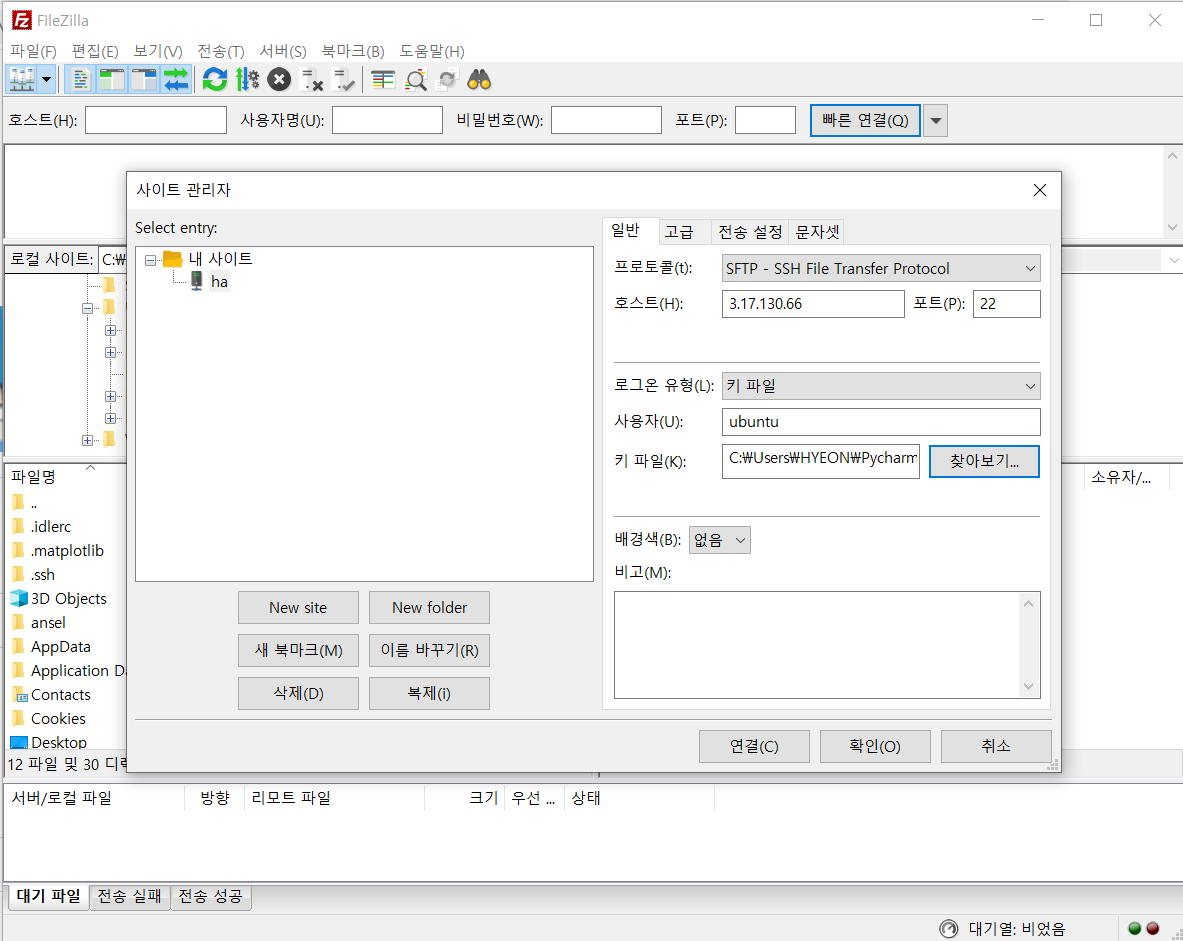

사이트 관리자에 들어가서 new site, 프로토콜(SFTP), 호스트ip입력해주고 포트는 22로  
로그온 유형은 키파일, 사용자는 aws는 ubuntu, googlecloudplatform은 본인 이메일아이디!  
키 파일은 pem파일 ( aws)
googlecloudplatform은 pub가 안붙은 파일을 넣어준다.

nginx콘테이너를 만든다.

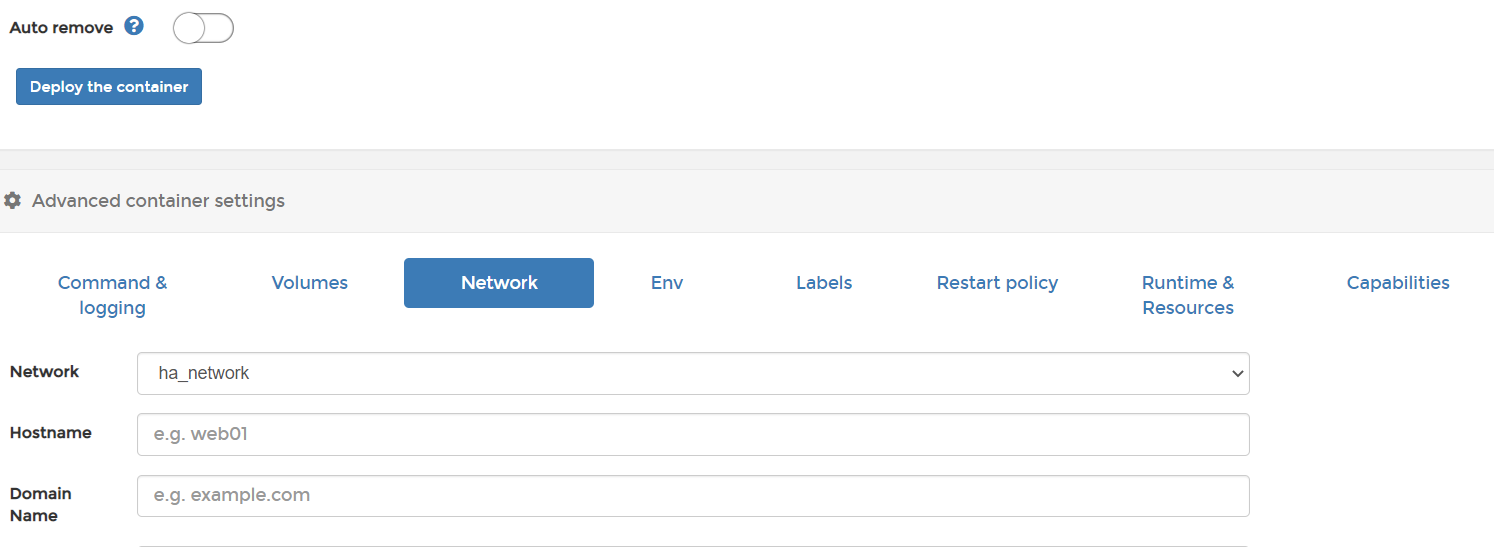